# load data

In [14]:
import pandas as pd
import spacy
import gensim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [27]:
df_skills_job = pd.read_json("./linkedin_skills_data_scien_final.json")
df_skills_uni = pd.read_json("./uni_datas_skills.json")

In [28]:
df_skills_job["skill"] = df_skills_job["skill"].str.lower()
df_skills_uni["skill"] = df_skills_uni["skill"].str.lower()

21335  Hard Skills collected - LinkedIn
4425  Soft Skills collected - LinkedIn
0.20740567143191938 ratio - LinkedIn

459  Hard Skills collected - University
107  Soft Skills collected - University
0.23311546840958605 ratio - University

86  Hard Skills intersection
3667  Hard Skills only - LinkedIn
290  Hard Skills only - University

16  Soft Skills intersection
1099  Soft Skills only - LinkedIn
32  Soft Skills only - University


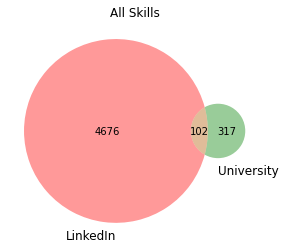

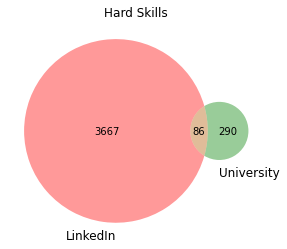

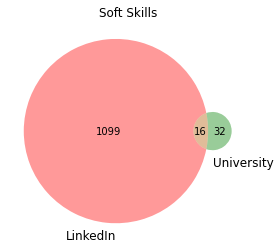

In [17]:
df_hard_job = df_skills_job[df_skills_job["label"]=="HARD"] 
df_soft_job = df_skills_job[df_skills_job["label"]=="SOFT"]
df_hard_uni = df_skills_uni[df_skills_uni["label"]=="HARD"] 
df_soft_uni = df_skills_uni[df_skills_uni["label"]=="SOFT"]

set_job = set(df_skills_job["skill"])
set_uni = set(df_skills_uni["skill"])

set_hard_job = set(df_hard_job["skill"])
set_hard_uni = set(df_hard_uni["skill"])
set_soft_job = set(df_soft_job["skill"])
set_soft_uni = set(df_soft_uni["skill"])

hard_intersect = set_hard_job & set_hard_uni
hard_only_job = set_hard_job - set_hard_uni
hard_only_uni = set_hard_uni - set_hard_job

soft_intersect = set_soft_job & set_soft_uni
soft_only_job = set_soft_job - set_soft_uni
soft_only_uni = set_soft_uni - set_soft_job

print(len(df_hard_job), " Hard Skills collected - LinkedIn")
print(len(df_soft_job), " Soft Skills collected - LinkedIn")
print(len(df_soft_job)/len(df_hard_job), "ratio - LinkedIn\n")

print(len(df_hard_uni), " Hard Skills collected - University")
print(len(df_soft_uni), " Soft Skills collected - University")
print(len(df_soft_uni)/len(df_hard_uni), "ratio - University\n")

print(len(hard_intersect), " Hard Skills intersection")
print(len(hard_only_job), " Hard Skills only - LinkedIn")
print(len(hard_only_uni), " Hard Skills only - University\n")

print(len(soft_intersect), " Soft Skills intersection")
print(len(soft_only_job), " Soft Skills only - LinkedIn")
print(len(soft_only_uni), " Soft Skills only - University")


fig, ax = plt.subplots()
ax.set_title("All Skills", fontsize=12)
v = venn2(subsets = (set_job, set_uni ), set_labels = ('LinkedIn', 'University'))
plt.show()
fig, ax = plt.subplots()
ax.set_title("Hard Skills", fontsize=12)
v = venn2(subsets = (set_hard_job, set_hard_uni ), set_labels = ('LinkedIn', 'University'))
plt.show()
fig, ax = plt.subplots()
ax.set_title("Soft Skills", fontsize=12)
v = venn2(subsets = (set_soft_job, set_soft_uni ), set_labels = ('LinkedIn', 'University'))
plt.show()

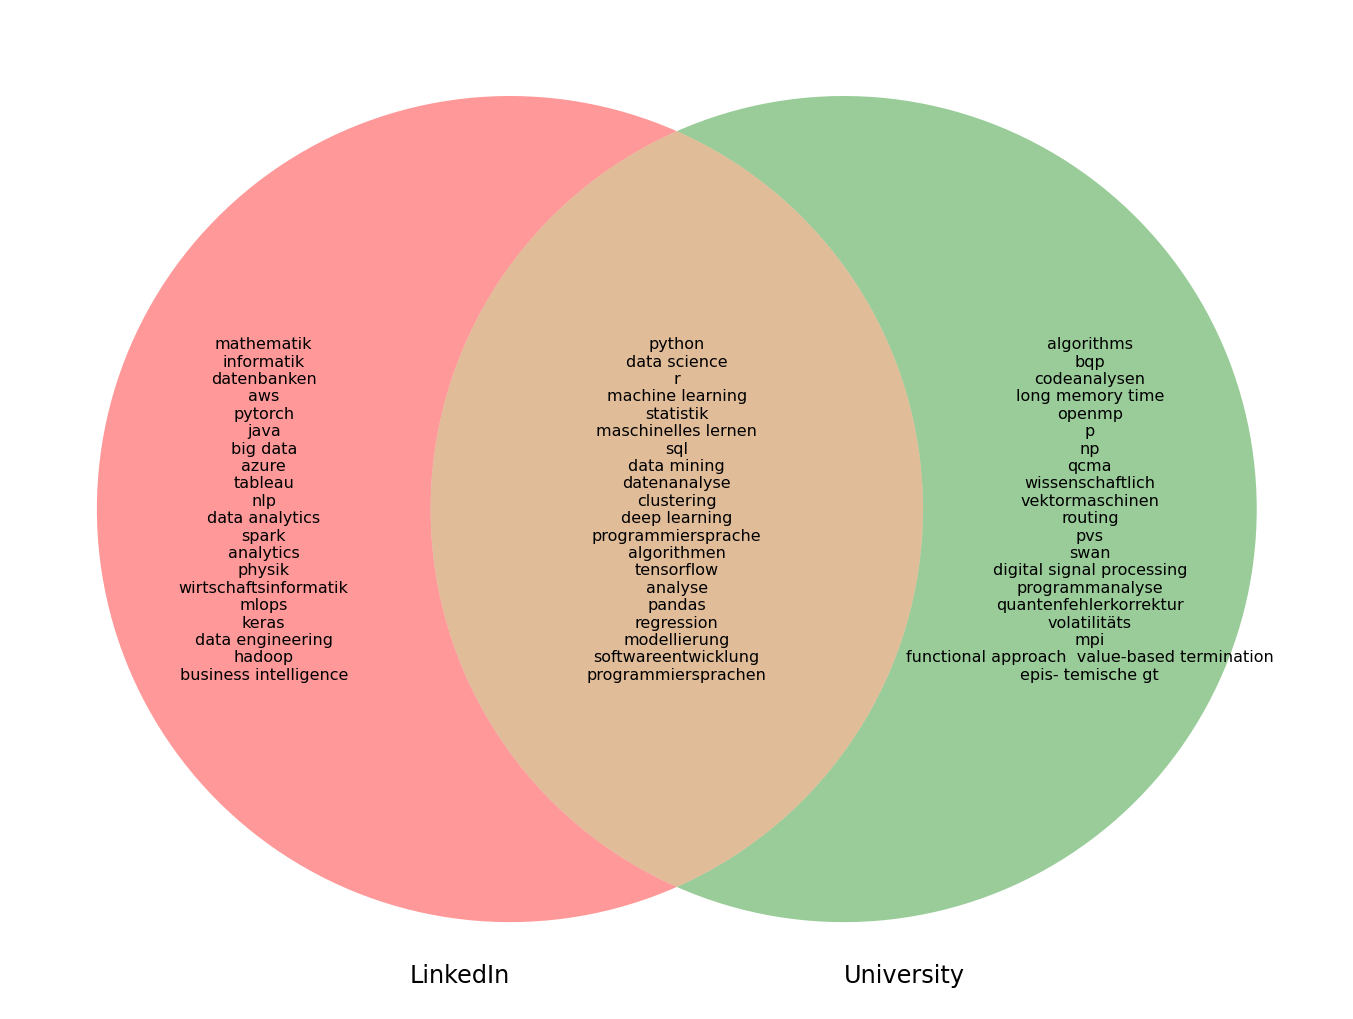

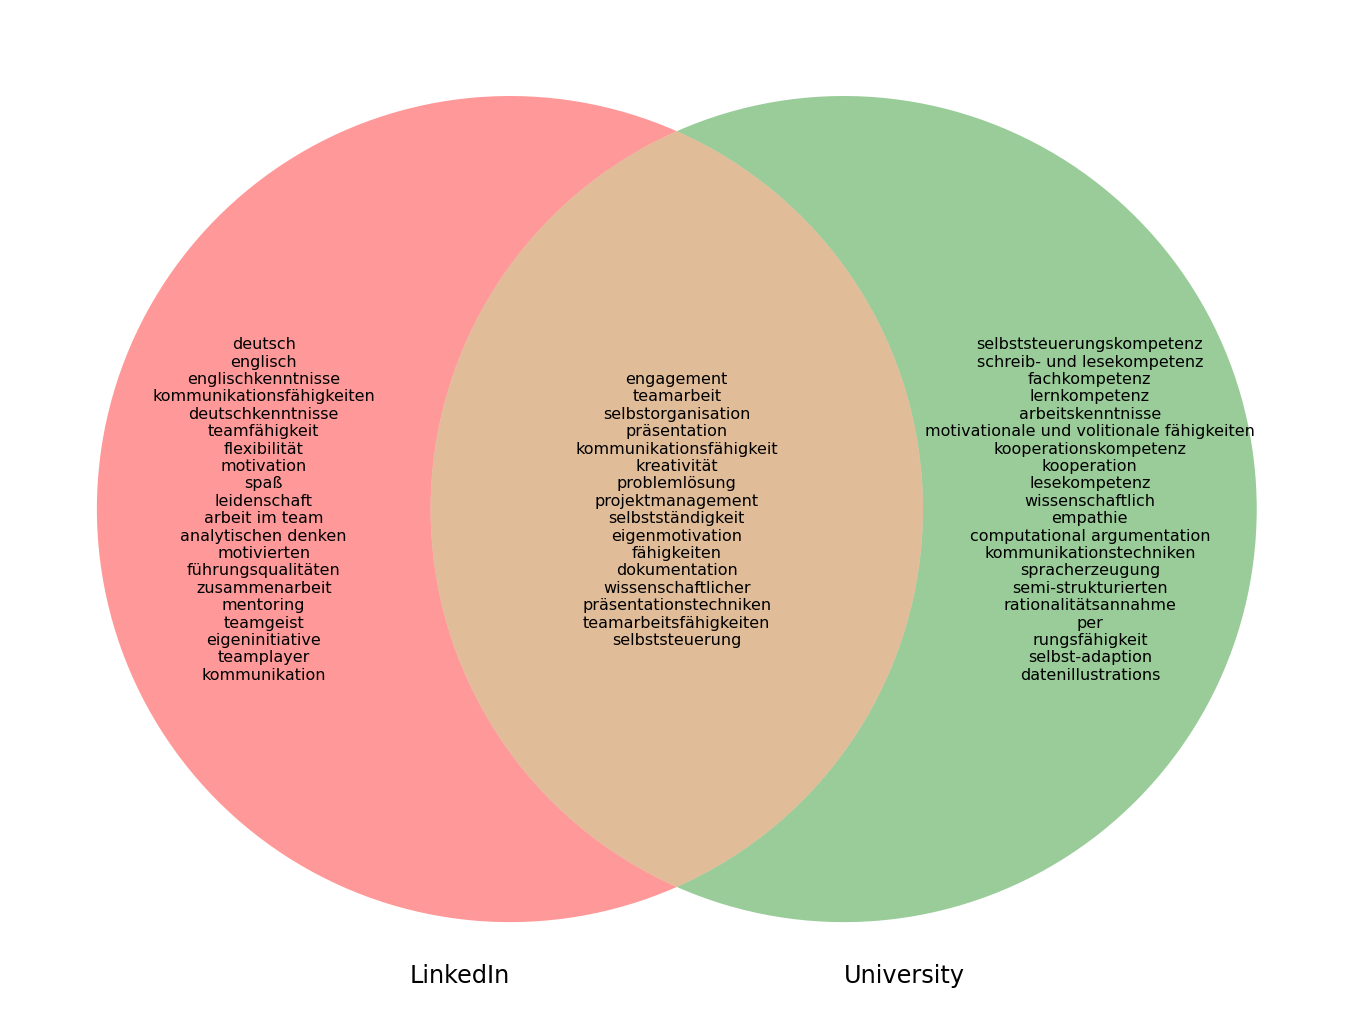

In [18]:
df_intersection_hard = pd.merge(df_hard_job, df_hard_uni, on='skill', how='inner')
df_inner_u = df_intersection_hard["skill"].value_counts().rename_axis('skill').reset_index(name='counts')

df_only_hard_job = df_hard_job[df_hard_job["skill"].isin(hard_only_job)]
df_only_hard_job_u = df_only_hard_job["skill"].value_counts().rename_axis('skill').reset_index(name='counts')

df_only_hard_uni = df_hard_uni[df_hard_uni["skill"].isin(hard_only_uni)]
df_only_hard_uni_u = df_only_hard_uni["skill"].value_counts().rename_axis('skill').reset_index(name='counts')


fig, ax = plt.subplots(figsize = (24,24))
# ax.set_title("Skill Comparism Hard Skills", fontsize=48)
v = venn2(subsets = (100,100,100 ), set_labels = ('LinkedIn', 'University'))
v.get_label_by_id("10").set_text("\n".join(df_only_hard_job_u[:20]["skill"]))
v.get_label_by_id("01").set_text("\n".join(df_only_hard_uni_u[:20]["skill"]))
v.get_label_by_id("11").set_text("\n".join(df_inner_u[:20]["skill"]))
for text in v.set_labels:
    text.set_fontsize(24)
for text in v.subset_labels:
    text.set_fontsize(16)
plt.show()

df_intersection_soft = pd.merge(df_soft_job, df_soft_uni, on='skill', how='inner')
df_inner_soft_u = df_intersection_soft["skill"].value_counts().rename_axis('skill').reset_index(name='counts')

df_only_soft_job = df_soft_job[df_soft_job["skill"].isin(soft_only_job)]
df_only_soft_job_u = df_only_soft_job["skill"].value_counts().rename_axis('skill').reset_index(name='counts')

df_only_soft_uni = df_soft_uni[df_soft_uni["skill"].isin(soft_only_uni)]
df_only_soft_uni_u = df_only_soft_uni["skill"].value_counts().rename_axis('skill').reset_index(name='counts')

fig, ax = plt.subplots(figsize = (24,25))
# ax.set_title("Skill Comparism Soft Skills", fontsize=48)
v = venn2(subsets = (100,100,100 ), set_labels = ('LinkedIn', 'University'))
v.get_label_by_id("10").set_text("\n".join(df_only_soft_job_u[:20]["skill"]))
v.get_label_by_id("01").set_text("\n".join(df_only_soft_uni_u[:20]["skill"]))
v.get_label_by_id("11").set_text("\n".join(df_inner_soft_u[:20]["skill"]))
for text in v.set_labels:
    text.set_fontsize(24)
for text in v.subset_labels:
    text.set_fontsize(16)
plt.show()

In [19]:
df_soft_job_u = df_soft_job["skill"].value_counts().rename_axis('skill').reset_index(name='counts')
df_soft_job_u.to_json("linkedin_soft_skills_ranked.json", orient="records")
df_soft_job_u[:15]

,skill,counts
0,deutsch,224
1,englisch,199
2,englischkenntnisse,143
3,kommunikationsfähigkeiten,135
4,deutschkenntnisse,79
5,teamfähigkeit,70
6,motivation,65
7,flexibilität,65
8,spaß,62
9,selbstorganisation,56


In [20]:
df_hard_job_u = df_hard_job["skill"].value_counts().rename_axis('skill').reset_index(name='counts')
df_hard_job_u.to_json("linkedin_hard_skills_ranked.json", orient="records")
df_hard_job_u[:15]

,skill,counts
0,python,1093
1,data science,677
2,sql,492
3,mathematik,469
4,statistik,443
5,r,416
6,informatik,397
7,machine learning,337
8,datenbanken,221
9,data mining,221


In [21]:
df_soft_uni_u = df_soft_uni["skill"].value_counts().rename_axis('skill').reset_index(name='counts')
df_soft_uni_u.to_json("university_soft_skills_ranked.json", orient="records")
df_soft_uni_u[:15]

,skill,counts
0,selbststeuerungskompetenz,27
1,engagement,9
2,teamarbeit,8
3,schreib- und lesekompetenz,6
4,lernkompetenz,4
5,fachkompetenz,4
6,arbeitskenntnisse,3
7,lesekompetenz,2
8,selbstständigkeit,2
9,motivationale und volitionale fähigkeiten,2


In [22]:
df_hard_uni_u = df_hard_uni["skill"].value_counts().rename_axis('skill').reset_index(name='counts')
df_hard_uni_u.to_json("university_hard_skills_ranked.json", orient="records")
df_hard_uni_u[:15]

,skill,counts
0,python,8
1,data science,6
2,r,6
3,clustering,5
4,programmiersprache,5
5,regression,4
6,machine learning,4
7,maschinelles lernen,4
8,mustererkennung,3
9,algorithmen,3


# similarity
https://newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python

In [23]:
nlp = spacy.load("../annotation/output/model-best")

In [24]:
from spacy.tokens import Doc

doc1 = Doc(nlp.vocab, words=df_hard_job["skill"])
doc2 = Doc(nlp.vocab, words=df_hard_uni["skill"])
print(doc1.similarity(doc2))
doc1 = Doc(nlp.vocab, words=df_soft_job["skill"])
doc2 = Doc(nlp.vocab, words=df_soft_uni["skill"])
print(doc1.similarity(doc2))

0.9413446432167127
0.8415605776253412


In [25]:
doc1 = Doc(nlp.vocab, words=df_hard_job["skill"])
doc2 = Doc(nlp.vocab, words=df_hard_uni["skill"])

inVal = nlp("data science")

print(doc1.similarity(inVal))
print(doc2.similarity(inVal))


0.6172956554189679
0.5689491310952669


https://dev.to/thepylot/compare-documents-similarity-using-python-nlp-4odp

In [26]:
df_hard_job = df_hard_job.assign(count='None')
for index, row in df_hard_job.iterrows():
    df_hard_job.iloc[index]["count"] = df_hard_job["skill"].str.count(row["skill"])


C:\Users\denni\AppData\Local\Temp/ipykernel_17516/1495177786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hard_job.iloc[index]["count"] = df_hard_job["skill"].str.count(row["skill"])


error: unbalanced parenthesis at position 1

In [ ]:
gen_docs = [df_hard_job["skill"][:100].to_numpy(), df_hard_uni["skill"][:100].to_numpy()]
dictionary = gensim.corpora.Dictionary(gen_docs)
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)
# for doc in tf_idf[corpus]:
#     print([[dictionary[id], np.around(freq, decimals=4)] for id, freq in doc])

In [ ]:
sims = gensim.similarities.Similarity('workdir/', tf_idf[corpus], num_features=len(dictionary))

In [ ]:
tempSkills = []
doc = nlp("Data Science ist ein toller Bereich mit vielen Facetten wie zum Beispiel Computer Vision und Problemlösung. Selbstmanagement. Lernkompetenz")
for ent in doc.ents:
    tempSkills.append(ent.text.lower())
    query_doc_bow = dictionary.doc2bow([ent.text.lower()]) 
    query_doc_tf_idf = tf_idf[query_doc_bow]
    print('Comparing Result:',ent.text, ent.label_, sims[query_doc_tf_idf]) 

Comparing Result: Data Science HARD [0.        0.2581989]
Comparing Result: Computer Vision HARD [0.10206208 0.        ]
Comparing Result: Problemlösung SOFT [0. 0.]


In [ ]:
tempSkills = []
doc = nlp("Data Science ist ein toller Bereich mit vielen Facetten wie zum Beispiel Computer Vision und Problemlösung.")
for ent in doc.ents:
    tempSkills.append(ent.text.lower())
    print(ent.text, ent.label_) 
query_doc_bow = dictionary.doc2bow(tempSkills) 
query_doc_tf_idf = tf_idf[query_doc_bow]
print('Comparing Result:', sims[query_doc_tf_idf]) 

Data Science HARD
Computer Vision HARD
Problemlösung SOFT
Comparing Result: [0.07216878 0.18257418]
